In [11]:
import pandas as pd
df = pd.read_csv('data.csv')
df

,Unnamed: 0.1,Unnamed: 0,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,...,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,surgery_time
0,0,0,1,5955,0,11542,-552,10848.0,1668,10368,...,120,0.0,100,70,0,10,0,0,0,145.0
1,1,1,2,2487,0,15741,-1039,14921.0,1721,14621,...,150,0.0,0,100,0,20,0,0,0,215.0
2,2,2,3,2861,0,4394,-590,4210.0,1090,3010,...,0,0.0,0,50,0,0,0,0,0,32.0
3,3,3,4,1903,0,20990,-778,20222.0,2522,17822,...,80,0.0,100,100,0,50,0,0,0,255.0
4,4,4,5,4416,0,21531,-1009,22391.0,2591,20291,...,0,0.0,0,160,0,10,900,0,2100,295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6383,6383,6384,5583,0,15248,-260,15640.0,2140,14140,...,150,0.0,0,90,0,20,0,0,0,200.0
6384,6384,6384,6385,2278,0,20643,-544,20996.0,2396,19496,...,100,0.0,0,100,0,25,30,0,300,285.0
6385,6385,6385,6386,4045,0,19451,-667,19133.0,3533,18233,...,70,0.0,0,130,0,10,0,0,0,245.0
6386,6386,6386,6387,5230,0,12025,-550,12830.0,1730,11030,...,120,0.0,0,50,0,0,0,0,0,155.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6388 entries, 0 to 6387
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         6388 non-null   int64  
 1   Unnamed: 0           6388 non-null   int64  
 2   caseid               6388 non-null   int64  
 3   subjectid            6388 non-null   int64  
 4   casestart            6388 non-null   int64  
 5   caseend              6388 non-null   int64  
 6   anestart             6388 non-null   int64  
 7   aneend               6388 non-null   float64
 8   opstart              6388 non-null   int64  
 9   opend                6388 non-null   int64  
 10  adm                  6388 non-null   int64  
 11  dis                  6388 non-null   int64  
 12  icu_days             6388 non-null   int64  
 13  death_inhosp         6388 non-null   int64  
 14  age                  6388 non-null   float64
 15  sex                  6388 non-null   o

In [13]:
df['emop']

0       0
1       0
2       0
3       0
4       1
       ..
6383    0
6384    0
6385    0
6386    0
6387    0
Name: emop, Length: 6388, dtype: int64

In [14]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'caseid', 'subjectid', 'casestart',
       'caseend', 'anestart', 'aneend', 'opstart', 'opend', 'adm', 'dis',
       'icu_days', 'death_inhosp', 'age', 'sex', 'height', 'weight', 'bmi',
       'asa', 'emop', 'department', 'optype', 'dx', 'opname', 'approach',
       'position', 'ane_type', 'preop_htn', 'preop_dm', 'preop_ecg',
       'preop_pft', 'preop_hb', 'preop_plt', 'preop_pt', 'preop_aptt',
       'preop_na', 'preop_k', 'preop_gluc', 'preop_alb', 'preop_ast',
       'preop_alt', 'preop_bun', 'preop_cr', 'preop_ph', 'preop_hco3',
       'preop_be', 'preop_pao2', 'preop_paco2', 'preop_sao2', 'cormack',
       'airway', 'tubesize', 'dltubesize', 'lmasize', 'iv1', 'iv2', 'aline1',
       'aline2', 'cline1', 'cline2', 'intraop_ebl', 'intraop_uo',
       'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid', 'intraop_colloid',
       'intraop_ppf', 'intraop_mdz', 'intraop_ftn', 'intraop_rocu',
       'intraop_vecu', 'intraop_eph', 'intraop_phe', 'intr

In [15]:
df['surgery_time'] = (df['opend'] - df['opstart']) / 60


Scroll down the webpage, a comprehensive data analysis on surgery stats. Maybe have a checkbox where the user can filter chosen attributes to view relationship between length of surgery, approach, type, department, bmi, age, sex, etc...

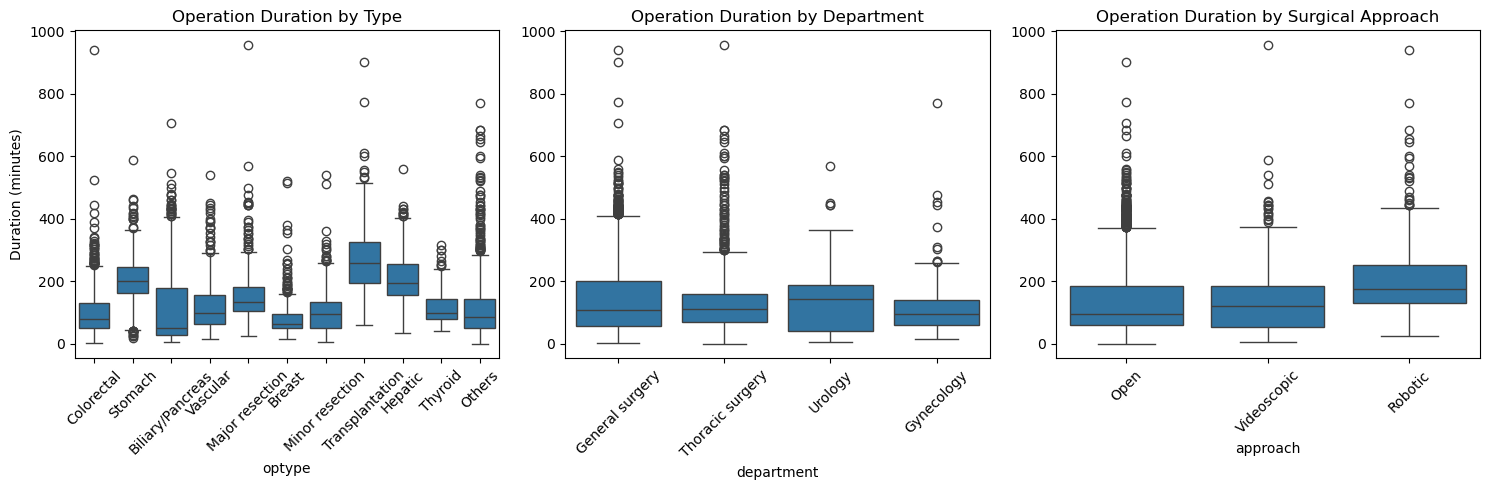

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Plot distributions of operation duration grouped by categories

plt.figure(figsize=(15, 5))

# A. Operation Duration vs Optype
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='optype', y='surgery_time')
plt.title('Operation Duration by Type')
plt.xticks(rotation=45)
plt.ylabel('Duration (minutes)')

# B. Operation Duration vs Department
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='department', y='surgery_time')
plt.title('Operation Duration by Department')
plt.xticks(rotation=45)
plt.ylabel('')

# C. Operation Duration vs Approach
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='approach', y='surgery_time')
plt.title('Operation Duration by Surgical Approach')
plt.xticks(rotation=45)
plt.ylabel('')

plt.tight_layout()
plt.show()


In [17]:
df.to_csv('data.csv')

In [18]:
df2 = pd.read_csv('datatest.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'datatest.csv'

In [47]:
df['optype'].unique()

array(['Colorectal', 'Stomach', 'Biliary/Pancreas', 'Vascular',
       'Major resection', 'Breast', 'Minor resection', 'Transplantation',
       'Hepatic', 'Thyroid', 'Others'], dtype=object)

In [19]:
df = df[df['icu_days'] <= 50]

<Axes: xlabel='intraop_ebl', ylabel='surgery_time'>

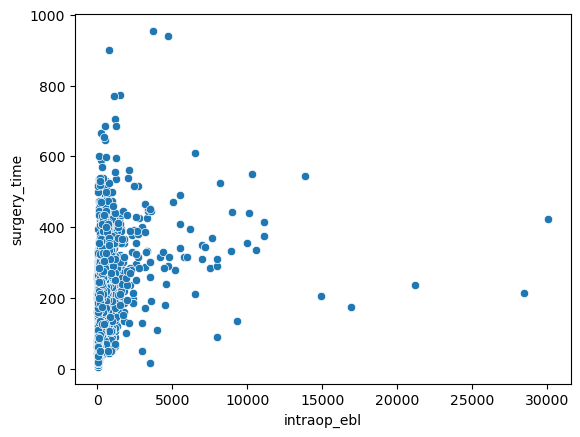

In [20]:
sns.scatterplot(data=df, y='surgery_time', x='intraop_ebl')

In [21]:
numeric_cols = df.select_dtypes(include='number')
correlations = numeric_cols.corr()['surgery_time'].drop('surgery_time')
top_corr = correlations.abs().sort_values(ascending=False)
print("Top correlated features with surgery_time:")
print(top_corr.head(15))


Top correlated features with surgery_time:
opend                  0.991172
caseend                0.989792
intraop_crystalloid    0.711721
intraop_rocu           0.549674
opstart                0.476592
intraop_uo             0.469555
lmasize                0.413918
intraop_ca             0.359311
intraop_colloid        0.319528
intraop_eph            0.315435
intraop_ebl            0.289996
intraop_phe            0.220004
icu_days               0.212291
intraop_ftn            0.180496
intraop_ffp            0.169195
Name: surgery_time, dtype: float64


<Axes: xlabel='intraop_crystalloid', ylabel='surgery_time'>

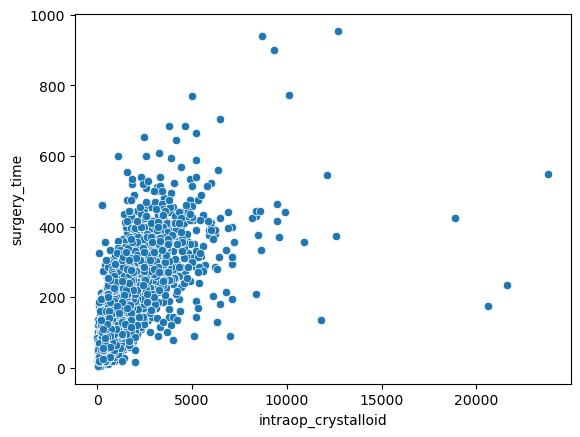

In [22]:
sns.scatterplot(data=df, y='surgery_time', x='intraop_crystalloid')

<Axes: xlabel='intraop_rocu', ylabel='surgery_time'>

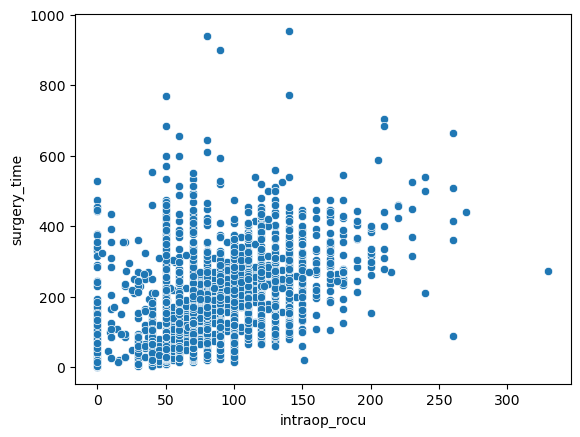

In [23]:
sns.scatterplot(data=df, y='surgery_time', x='intraop_rocu')

<Axes: xlabel='lmasize', ylabel='surgery_time'>

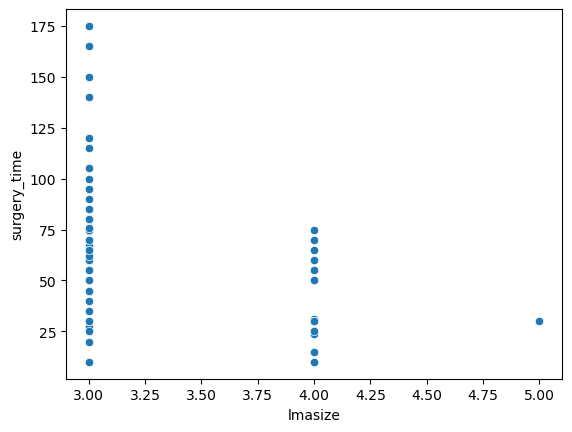

In [24]:
sns.scatterplot(data=df, y='surgery_time', x='lmasize')

In [25]:
numeric_cols = df.select_dtypes(include='number')
correlations = numeric_cols.corr()['icu_days'].drop('icu_days')
top_corr = correlations.abs().sort_values(ascending=False)
print("Top correlated features with surgery_time:")
print(top_corr.head(15))

Top correlated features with surgery_time:
preop_alt              0.358985
preop_alb              0.324960
intraop_ca             0.310644
death_inhosp           0.307758
asa                    0.300046
intraop_ebl            0.286794
preop_pt               0.279329
intraop_crystalloid    0.273859
preop_ast              0.252298
intraop_ffp            0.248025
preop_na               0.239750
preop_hb               0.227424
emop                   0.217893
opend                  0.216344
caseend                0.213018
Name: icu_days, dtype: float64


<Axes: xlabel='preop_alt', ylabel='icu_days'>

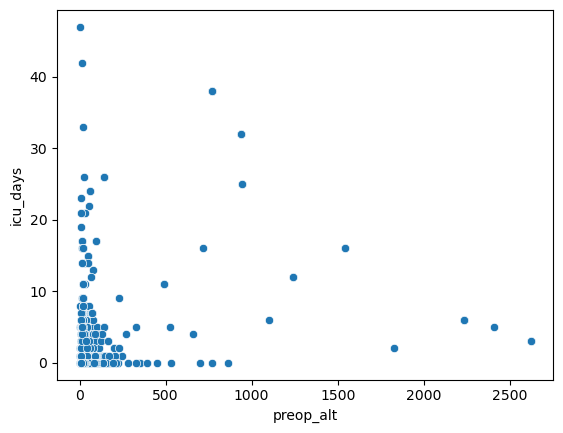

In [26]:
sns.scatterplot(data=df, y='icu_days', x='preop_alt')

<Axes: xlabel='preop_alb', ylabel='icu_days'>

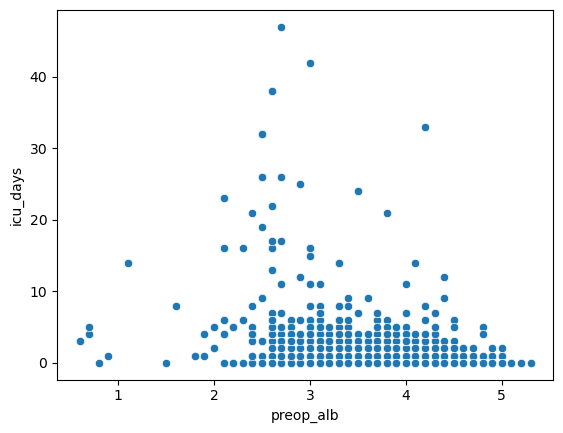

In [28]:
sns.scatterplot(data=df, y='icu_days', x='preop_alb')

In [27]:
df = df[df['icu_days'] <= 50]